## DATA EXPLORATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv')
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
df = df.sample(frac=0.5)

In [4]:
s= pd.read_csv('songs.csv')

In [5]:
df = pd.merge(df, s, on='song_id', how='left')
del s

In [6]:
m = pd.read_csv('members.csv')

In [7]:
df = pd.merge(df, m, on='msno', how='left')
del m

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 534.7+ MB


In [9]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,nEfMC/pRAtlc1syOCw43aNGJ9bsMnsSpJa7LlMw+IFk=,jceXeAoNeYd3hRvbWRdqCUinjutJgWRyvPezTymyvTc=,my library,Local playlist more,local-library,1,258847.0,359,Coldplay,NaN,NaN,52.0,1,0,NaN,4,20151126,20170912
1,nplMegmwS+nEyaJzbGmhgIHkHXeAbNn3sRKHx2uvu5E=,RA7mi79kNyiHfJMSA07W0Bu9/W1SUYNaEikO6SjgdKQ=,my library,Local playlist more,local-library,1,76997.0,921,Pitch Perfect Soundtrack,A.P. Carter| Luisa Gerstein,NaN,52.0,1,0,NaN,7,20120116,20170925
2,xIBp1CZeanRv7wqE8ewlbhEyV18Wx6FN0eXW3/yJo2U=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,my library,Search,online-playlist,1,227404.0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,52.0,1,0,NaN,4,20161015,20161018
3,/UL0GIplIh5mfrH8DRG4HT+IBWz9qOjeb5t4fR8J4SI=,rygr0XqEqj/ogj1eoNZgTXk9jKXbull5dOK8X6HnlHM=,my library,Local playlist more,local-library,0,250253.0,2022,旺福 (Wonfu),姚小民,姚小民,3.0,1,0,NaN,7,20151027,20170930
4,08EDUa8/W+LJcjs/m8edwWHSTLQtZWkVJJEp7X6dtLI=,beSE8CuzgQFsKOMePDP3odhp8NIyNTfFGH47GnkTxYs=,radio,Radio,radio,1,277942.0,465,劉若英 (Rene Liu),劉若英,姚若龍,3.0,22,0,NaN,7,20120619,20170928


## FILLING NULL VALUES

In [10]:
df.isnull().sum()

msno                            0
song_id                         0
source_system_tab           12445
source_screen_name         207553
source_type                 10735
target                          0
song_length                    54
genre_ids                   59411
artist_name                    54
composer                   838064
lyricist                  1589887
language                       75
city                            0
bd                              0
gender                    1480096
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [11]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688655e+06,3.688634e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.034401e-01,2.451072e+05,1.861515e+01,7.513056e+00,1.754313e+01,6.793401e+00,2.012809e+07,2.017156e+07
std,4.999882e-01,6.722046e+04,2.117902e+01,6.642440e+00,2.147797e+01,2.276028e+00,3.017031e+04,3.874607e+03
min,0.000000e+00,1.950000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.417890e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721370e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,8.679526e+06,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


In [12]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")

In [13]:
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [14]:
df.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [15]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')

In [16]:
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

In [17]:
df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [18]:
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [19]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,nEfMC/pRAtlc1syOCw43aNGJ9bsMnsSpJa7LlMw+IFk=,jceXeAoNeYd3hRvbWRdqCUinjutJgWRyvPezTymyvTc=,my library,Local playlist more,local-library,1,258847.0,359,Coldplay,unknown,...,unknown,4,2015-11-26,2017-09-12,2015,11,26,2017,9,12
1,nplMegmwS+nEyaJzbGmhgIHkHXeAbNn3sRKHx2uvu5E=,RA7mi79kNyiHfJMSA07W0Bu9/W1SUYNaEikO6SjgdKQ=,my library,Local playlist more,local-library,1,76997.0,921,Pitch Perfect Soundtrack,A.P. Carter| Luisa Gerstein,...,unknown,7,2012-01-16,2017-09-25,2012,1,16,2017,9,25
2,xIBp1CZeanRv7wqE8ewlbhEyV18Wx6FN0eXW3/yJo2U=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,my library,Search,online-playlist,1,227404.0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,...,unknown,4,2016-10-15,2016-10-18,2016,10,15,2016,10,18
3,/UL0GIplIh5mfrH8DRG4HT+IBWz9qOjeb5t4fR8J4SI=,rygr0XqEqj/ogj1eoNZgTXk9jKXbull5dOK8X6HnlHM=,my library,Local playlist more,local-library,0,250253.0,2022,旺福 (Wonfu),姚小民,...,unknown,7,2015-10-27,2017-09-30,2015,10,27,2017,9,30
4,08EDUa8/W+LJcjs/m8edwWHSTLQtZWkVJJEp7X6dtLI=,beSE8CuzgQFsKOMePDP3odhp8NIyNTfFGH47GnkTxYs=,radio,Radio,radio,1,277942.0,465,劉若英 (Rene Liu),劉若英,...,unknown,7,2012-06-19,2017-09-28,2012,6,19,2017,9,28


In [20]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes


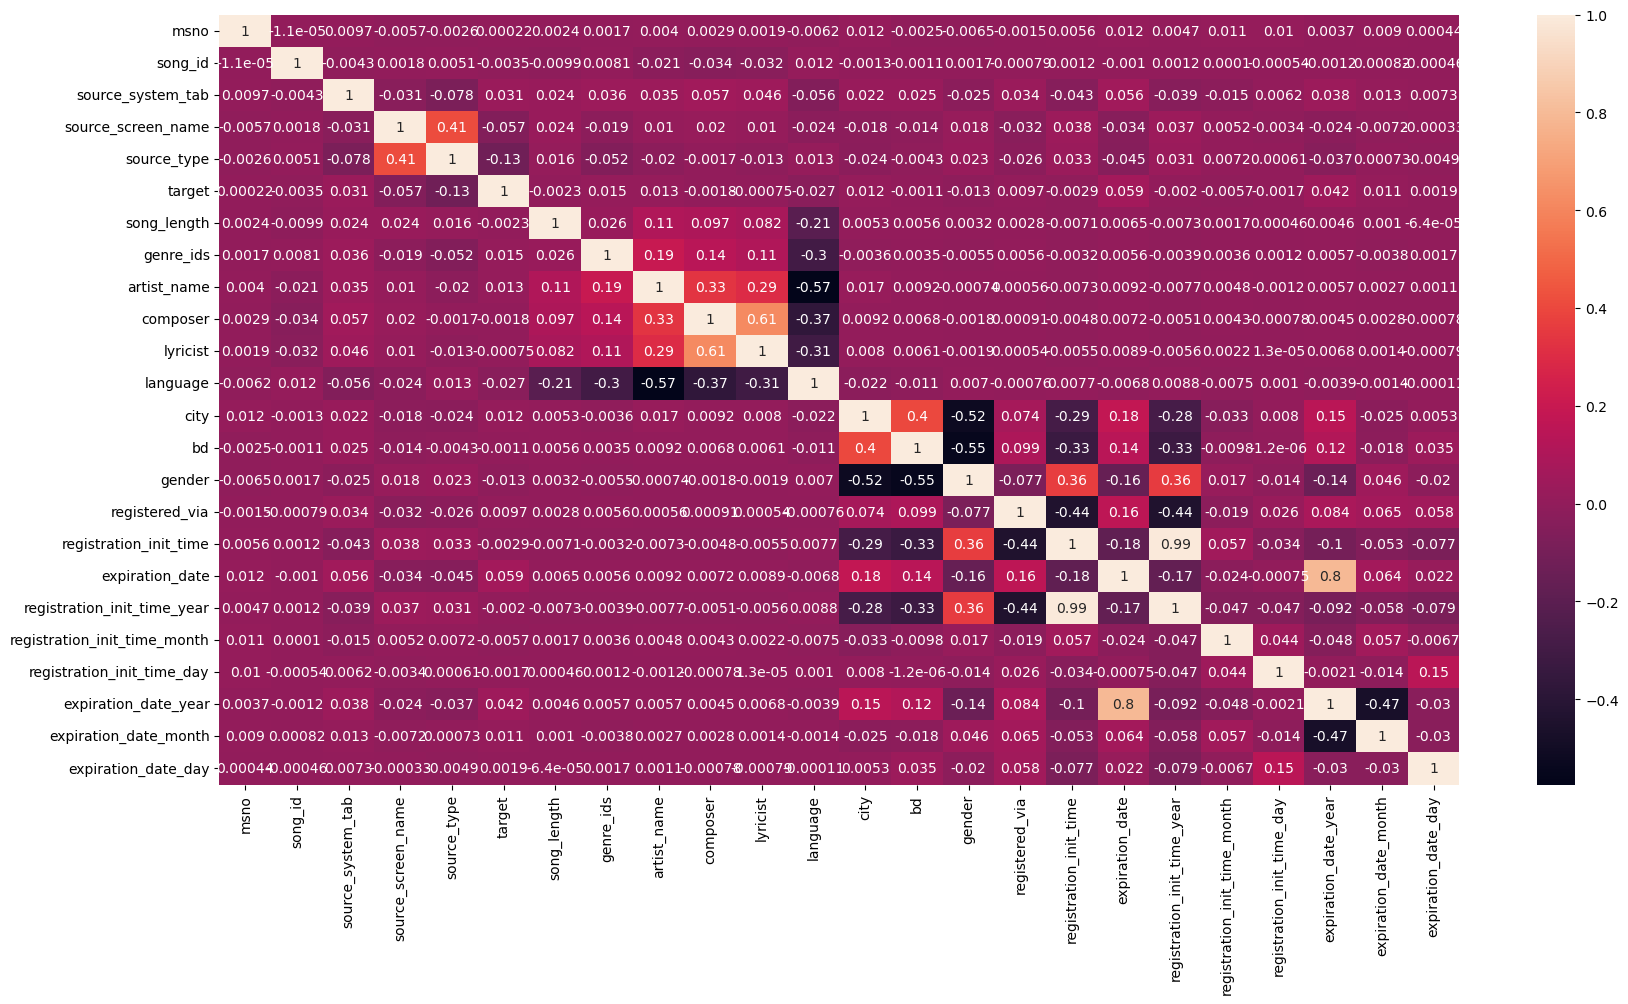

In [21]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

## TRAIN AND TEST

In [22]:
target = df.pop('target')
X_train, X_test, y_train, y_test = train_test_split( df , target, test_size = 0.2)

In [23]:
r = RandomForestClassifier()
r.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
r_Score = r.score(X_train,y_train)
r_Score

0.9999952557924233

In [25]:
r_TestScore = r.score(X_test, y_test)
r_TestScore

0.7163276592629944

In [26]:
y_pred =r.predict( X_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy = accuracy_score(y_test, y_pred)

In [30]:
accuracy

0.7163276592629944